# Exploring the Moon with Machine Learning

<img width="75%" src="../img/Lunar_Albedo_Header.png"> </img>


# Chemical Composition Map

<img width="75%" src="../img/Lunar_Composition_Maps.png"> </img>

### The chemical composition of lunar rocks determines how light or dark the surface is. Note the relationship between high iron (Fe) and dark regions on the Moon in the above maps. 

### Machine learning can discover the relationship between the visible appearance of the Moon (its albedo) and its chemical composition. 

### Once that relationship is known, the albedo map can be predicted from chemical maps.

# Activate Libraries Needed For This Analysis

In [1]:
import ROOT
from ROOT import TMVA,TFile, TTree, TCut, TString, TCanvas,  TASImage
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
%matplotlib inline

Welcome to JupyROOT 6.12/06


# Plotting the data
The data include the Lunar albedo map (visible appearance of the Moon) and maps of chemical composition as measured by Lunar Prospector. 

Maps are:

Lunar iron (Fe) = LPFe_Map.csv

Lunar titanium (Ti) = LPFe_Map.csv

Lunar potassium (K) = LPK_Map.csv

Lunar thorium (Th) = LPTh_Map.csv

Lunar iron (Fe) = LPFe_Map.csv

Lunar fast neutrons (fast) = Fast_Map.csv

Lunar thermal neutrons (therm) = Therm_Map.csv


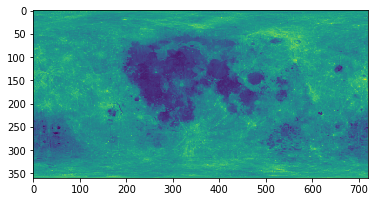

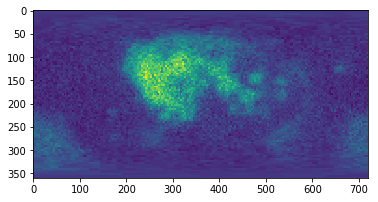

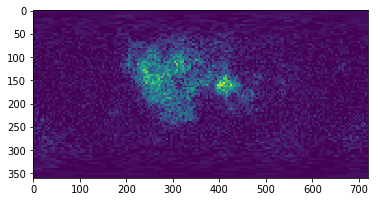

In [2]:
img=np.genfromtxt('data/Updated Maps/Albedo_Map.csv',delimiter=',')
imgplot = plt.imshow(img)
plt.show()

img=np.genfromtxt('data/Updated Maps/LPFe_Map.csv',delimiter=',')
imgplot = plt.imshow(img)
plt.show()

img=np.genfromtxt('data/Updated Maps/LPTi_Map.csv',delimiter=',')
imgplot = plt.imshow(img)
plt.show()

### Earlier we showed that Fe is a major factor for brightness (albedo). Higher iron = darker color.

### However note that other elements are also important, such as titanium shown above. 

### Exercise: Use the code above to plot other chemical maps and look for visual relationships between chemical composition and albedo. Which elements are important?


# Machine Learning

## Machine Learning is a science that studies algorithms capable of learning from data.

<img width="25%" src="../img/ML_Robot.png"> </img>

### Can Machine Learning identify relationships between lunar chemistry and lunar albedo? If so, can it teach us anything new about the Moon?

# Data Preparation

Read in chemical maps, stored in dataset.root file


In [3]:
TMVA.Tools.Instance();    #TMVA is the machine learning toolkit used for this project

inputFile = TFile.Open("data/dataset.root");
outputFile = TFile.Open("TMVAOutputBDT.root", "RECREATE");

factory = TMVA.Factory("TMVARegression", outputFile,
                      "!V:!Silent:Color:DrawProgressBar:AnalysisType=Regression" ); 

## Declare Variables
Define input variables, which are the chemical maps, and the target to be learned - the albedo map.

In [4]:
loader = TMVA.DataLoader("dataset"); 

loader.AddVariable("Fast_Map_extra", "", "units", 'F' );
loader.AddVariable("LPFe_Map", "", "units", 'F' );
loader.AddVariable("LPK_Map_extra", "", "units", 'F' );
loader.AddVariable("LPTh_Map", "", "units", 'F' );
loader.AddVariable("LPTi_Map", "", "units", 'F' );
loader.AddVariable("Therm_Map", "", "units", 'F' );

loader.AddTarget( "Albedo_Map" );

## Organize Data
This computer program organizes data into structures called trees

In [5]:
tree=TTree()        
inputFile.GetObject("TreeR", tree);

loader.AddRegressionTree(tree, 1.0);
loader.PrepareTrainingAndTestTree(TCut(""),"nTrain_Regression=129600:nTest_Regression=129960:SplitMode=Random:NormMode=NumEvents:!V" );

DataSetInfo              : [dataset] : Added class "Regression"
                         : Add Tree TreeR of type Regression with 259560 events
                         : Dataset[dataset] : Class index : 0  name : Regression


# Machine Learning Methods and Applications

## There are two main types of machine learning applications: classification and regression.

## Classification is when the program learns to predict a class or a type of an object (for example, does a picture contain a cat or dog)

<img width="40%" src="../img/Cat_or_Dog.jpg"> </img>


## Regression is when the program  learns to predict an unknown property of an object, for example the weight of the cat in the picture

<img width="25%" src="../img/Cat_on_Scale.jpg"> </img>

## This example uses a machine learning algorithm called a boosted decision tree (BDT). Boosted decision trees can be used for both classification and regression. 

<img width="35%" src="../img/Decision_Tree.jpg"> </img>


In [6]:
# Boosted Decision Trees 
factory.BookMethod(loader,TMVA.Types.kBDT, "BDTG","!H:!V:NTrees=200::BoostType=Grad:Shrinkage=0.3:nCuts=20:MaxDepth=4:RegressionLossFunctionBDTG=AbsoluteDeviation");

Factory                  : Booking method: BDTG
                         : 
                         : the option *InverseBoostNegWeights* does not exist for BoostType=Grad --> change
                         : to new default for GradBoost *Pray*
DataSetFactory           : [dataset] : Number of events in input trees
                         : 
                         : Number of training and testing events
                         : ---------------------------------------------------------------------------
                         : Regression -- training events            : 129600
                         : Regression -- testing events             : 129960
                         : Regression -- training and testing events: 259560
                         : 
DataSetInfo              : Correlation matrix (Regression):
                         : ---------------------------------------------------------------------------------
                         :                 Fast_Map_extra 

## All machine learning algorithms require training. We will train a boosted decision tree on one half of the Moon (the training dataset).

## We will then apply the trained algorithm to the other half. The algorithm will use the chemical maps to predict the albedo of the other half of the Moon.

# Train Method

In [7]:
factory.TrainAllMethods();

Factory                  : Train all methods
Factory                  : [dataset] : Create Transformation "I" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'Fast_Map_extra' <---> Output : variable 'Fast_Map_extra'
                         : Input : variable 'LPFe_Map' <---> Output : variable 'LPFe_Map'
                         : Input : variable 'LPK_Map_extra' <---> Output : variable 'LPK_Map_extra'
                         : Input : variable 'LPTh_Map' <---> Output : variable 'LPTh_Map'
                         : Input : variable 'LPTi_Map' <---> Output : variable 'LPTi_Map'
                         : Input : variable 'Therm_Map' <---> Output : variable 'Therm_Map'
TFHandler_Factory        :       Variable              Mean              RMS      [        Min              Max ]
                         : --------------------------------------------------------------

0%, time left: unknown
7%, time left: 46 sec
13%, time left: 44 sec
19%, time left: 38 sec
25%, time left: 33 sec
32%, time left: 30 sec
38%, time left: 27 sec
44%, time left: 23 sec
50%, time left: 21 sec
57%, time left: 18 sec
63%, time left: 15 sec
69%, time left: 12 sec
75%, time left: 10 sec
82%, time left: 7 sec
88%, time left: 5 sec
94%, time left: 2 sec
0%, time left: unknown
6%, time left: 2 sec
12%, time left: 2 sec
18%, time left: 2 sec
25%, time left: 1 sec
31%, time left: 1 sec
37%, time left: 1 sec
43%, time left: 1 sec
50%, time left: 1 sec
56%, time left: 1 sec
62%, time left: 0 sec
68%, time left: 0 sec
75%, time left: 0 sec
81%, time left: 0 sec
87%, time left: 0 sec
93%, time left: 0 sec


# Test and Evaluate

In [8]:
factory.TestAllMethods();
factory.EvaluateAllMethods();    

Factory                  : Test all methods
Factory                  : Test method: BDTG for Regression performance
                         : 
                         : Dataset[dataset] : Create results for testing
                         : Dataset[dataset] : Evaluation of BDTG on testing sample
                         : Dataset[dataset] : Elapsed time for evaluation of 129960 events: 2.49 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Evaluate all methods
                         : Evaluate regression method: BDTG
TFHandler_BDTG           :       Variable              Mean              RMS      [        Min              Max ]
                         : -----------------------------------------------------------------------------------------
                         : Fas

0%, time left: unknown
6%, time left: 2 sec
12%, time left: 2 sec
18%, time left: 2 sec
25%, time left: 1 sec
31%, time left: 1 sec
37%, time left: 1 sec
43%, time left: 1 sec
50%, time left: 1 sec
56%, time left: 1 sec
62%, time left: 0 sec
68%, time left: 0 sec
75%, time left: 0 sec
81%, time left: 0 sec
87%, time left: 0 sec
93%, time left: 0 sec


# Save the Results

In [9]:
#%jsroot on
outputFile.Close();
resultsFile = TFile.Open("TMVAOutputBDT.root");
resultsTree = resultsFile.Get("dataset/TestTree"); 

result = np.genfromtxt ('data/result.txt', delimiter=",")
result = result.reshape(-1, 361)
np.savetxt('data/result.csv', result , delimiter=',') 

## Plot the training (left half) of the Moon

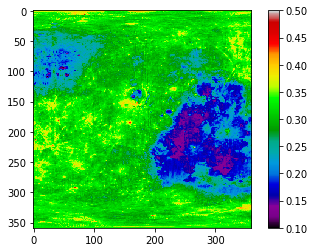

In [10]:
datatrain=p.read_csv("data/Albedo_Map.csv.train",dtype=float)
imgplot = plt.imshow(datatrain) #Needs to be in row,col order
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## Plot the predicted (right) half of the Moon

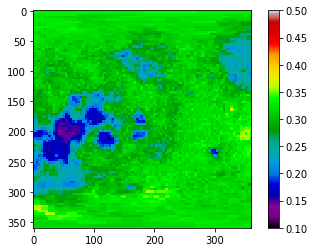

In [11]:
imgplot = plt.imshow(result) #Needs to be in row,col order
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()


## Plot the actual (right) half of the Moon¶

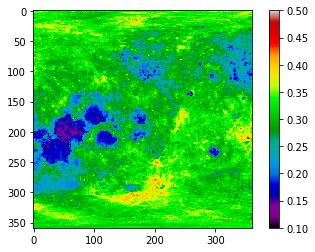

In [12]:
datatest=p.read_csv("data/Albedo_Map.csv.test",dtype=float)
imgplot = plt.imshow(datatest) #Needs to be in row,col order
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## Now plot the whole predicted Moon 

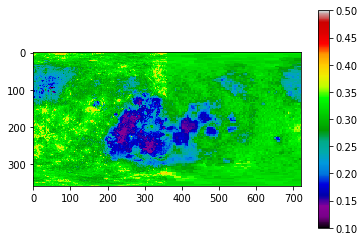

In [13]:
alldatatrainresult=p.read_csv("data/AlbedoTrainResult.csv",dtype=float)
imgplot = plt.imshow(alldatatrainresult) #Needs to be in row,col order
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## Now plot the whole actual Moon

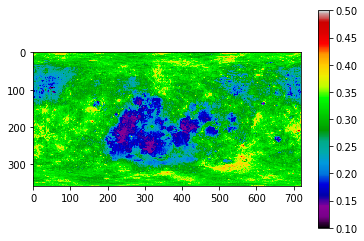

In [14]:
alldata=p.read_csv("data/Albedo_Map.csv",dtype=float)
imgplot = plt.imshow(alldata) #Needs to be in row,col order
imgplot.set_cmap('nipy_spectral')
plt.clim(0.10,0.5)
plt.colorbar()
plt.show()

## How well did the algorithm do in predicting the albedo map of the right side of the Moon?

## Can you spot any differences? What could those difference indicate?